country: ชื่อประเทศ

child_mort: อัตราการเสียชีวิตของเด็กอายุต่ำกว่า 5 ปี ต่อการเกิด 1,000 คน

exports: มูลค่าการส่งออกสินค้าต่อหัว คิดเป็นเปอร์เซ็นต์ของ GDP ต่อหัว

health: การใช้จ่ายด้านสุขภาพต่อหัว คิดเป็นเปอร์เซ็นต์ของ GDP ต่อหัว

imports: มูลค่าการนำเข้าสินค้าต่อหัว คิดเป็นเปอร์เซ็นต์ของ GDP ต่อหัว

Income: รายได้สุทธิต่อคน

Inflation: อัตราการเติบโตประจำปีของ GDP รวม

life_expec: อายุขัยเฉลี่ยที่เด็กแรกเกิดคาดว่าจะมีชีวิตอยู่ หากรูปแบบการตายในปัจจุบันยังคงอยู่

total_fer: จำนวนบุตรที่ผู้หญิงแต่ละคนคาดว่าจะมี หากอัตราการเกิดในปัจจุบันยังคงอยู่

gdpp: GDP ต่อหัว คำนวณจาก GDP รวม หารด้วยจำนวนประชากร





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances

In [ ]:
data = pd.read_csv('Country-data.csv')

In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
numeric_data = data.select_dtypes(include=['number'])
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

In [ ]:
print(data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [ ]:
duplicates = data.duplicated().sum()
print(f"Number of duplicates in 'country': {duplicates}")

Number of duplicates in 'country': 0


In [ ]:
correlation_matrix = numeric_data.corr()

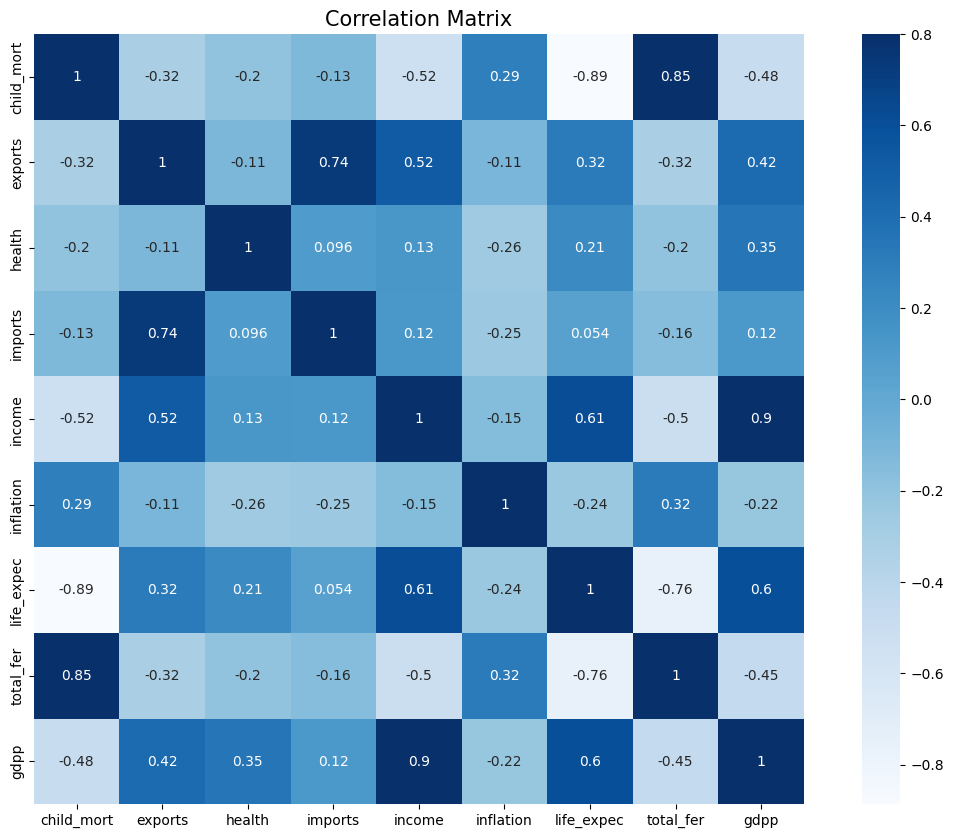

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(correlation_matrix, vmax=.8, square=True, annot=True, cmap='Blues')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

**PCA**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

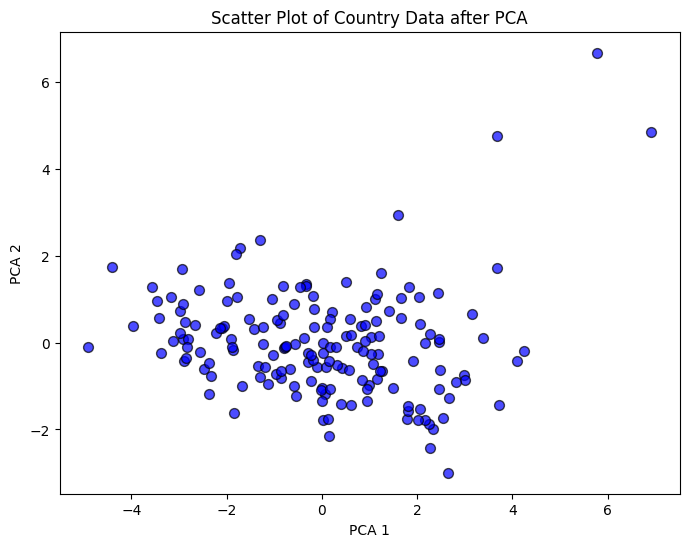

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50, alpha=0.7, marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot of Country Data after PCA')
plt.show()

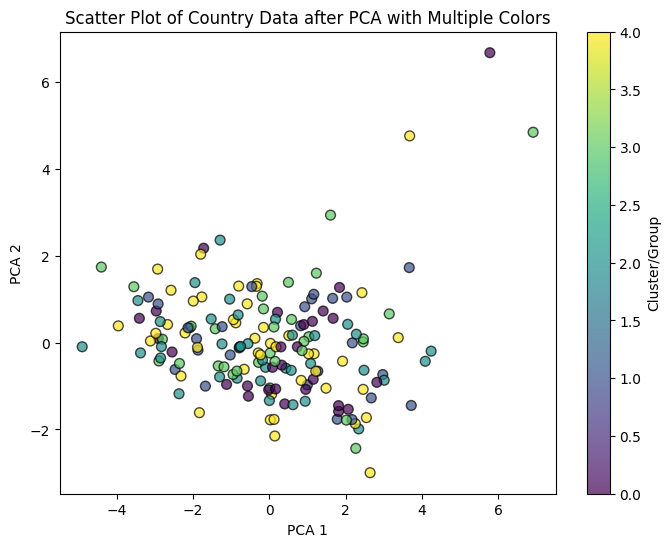

In [ ]:

colors = np.random.randint(0, 5, size=len(data))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot of Country Data after PCA with Multiple Colors')
plt.colorbar(scatter, label='Cluster/Group')
plt.show()

In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_


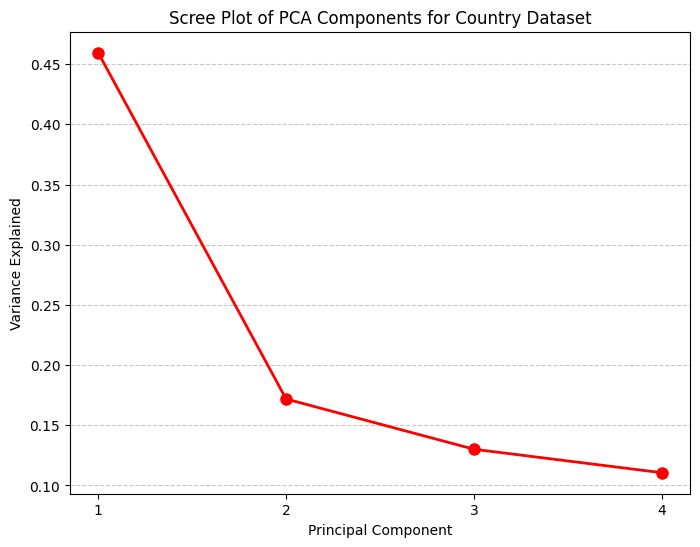

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', color='red', linestyle='-',
         linewidth=2, markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA Components for Country Dataset')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**ส่วนตรวจสอบ PCA**

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance)

Explained Variance Ratio for each Principal Component:
[0.4595174  0.17181626 0.13004259 0.11053162]


In [ ]:
print("Shape of data after PCA:")
print(data.shape)

Shape of data after PCA:
(167, 10)


In [ ]:
print(data.head())
print(data.describe())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      

**K-Means**

In [ ]:
from sklearn.metrics import silhouette_score

# ทำ K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_result)

# ประเมินคุณภาพการ clustering ด้วย Silhouette Score
silhouette_avg = silhouette_score(pca_result, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# ประเมินคุณภาพการ clustering ด้วย Inertia (Sum of squared distances to nearest cluster center)
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.4f}")

Silhouette Score: 0.3318
Inertia: 643.4115


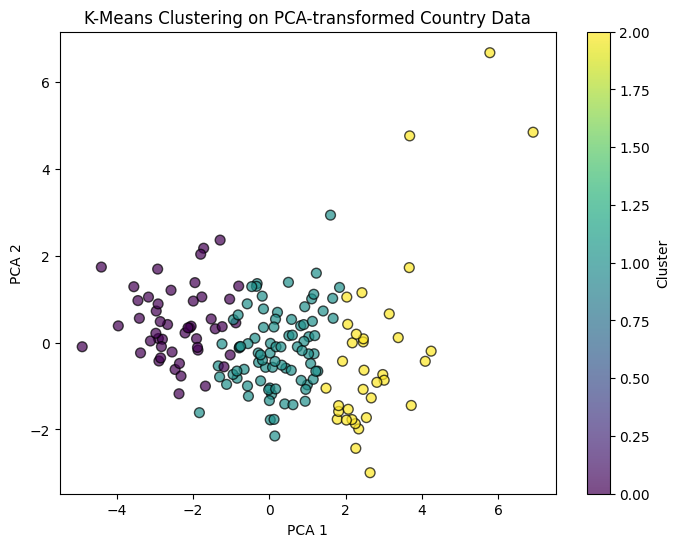

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_result)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering on PCA-transformed Country Data')
plt.colorbar(label='Cluster')
plt.show()

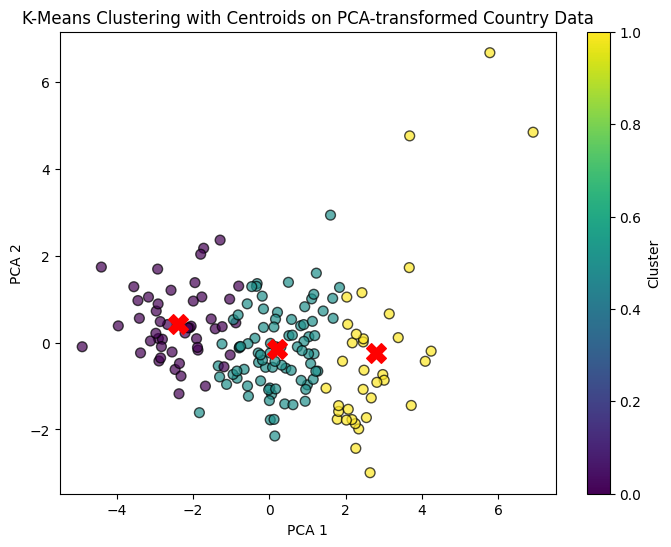

In [ ]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)  # จุด Centroid
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering with Centroids on PCA-transformed Country Data')
plt.colorbar(label='Cluster')
plt.show()

**ส่วนตรวจสอบ K-Means**

In [ ]:
data.insert(0, 'Country', data['country'])
data['class'] = kmeans.labels_
data['Label'] = data['class']

print(pd.Series(kmeans.labels_).value_counts())

1    84
0    48
2    35
Name: count, dtype: int64


In [ ]:
data['PCA 1'] = pca_result[:, 0]
data['PCA 2'] = pca_result[:, 1]

data['Cluster'] = kmeans.labels_

result_data = data[['Country', 'PCA 1', 'PCA 2', 'Cluster']]

print(result_data.head())

               Country     PCA 1     PCA 2  Cluster
0          Afghanistan -2.913025  0.095621        0
1              Albania  0.429911 -0.588156        1
2              Algeria -0.285225 -0.455174        1
3               Angola -2.932423  1.695555        0
4  Antigua and Barbuda  1.033576  0.136659        1


In [ ]:
print(data[['Country', 'class']].head())  # ดูคลาสของทุกประเทศ

               Country  class
0          Afghanistan      0
1              Albania      1
2              Algeria      1
3               Angola      0
4  Antigua and Barbuda      1


In [ ]:
print("Number of unique classes:", data['class'].nunique())

Number of unique classes: 3


In [ ]:
class_mapping = {
    0: 'Poor countries',
    1: 'Midle countries',
    2: 'Rich countries'
}

data['Label'] = data['class'].map(class_mapping)

print(data[['Country', 'class', 'Label']].head())


               Country  class            Label
0          Afghanistan      0   Poor countries
1              Albania      1  Midle countries
2              Algeria      1  Midle countries
3               Angola      0   Poor countries
4  Antigua and Barbuda      1  Midle countries


In [ ]:
print(data['Label'].value_counts())


Label
Midle countries    84
Poor countries     48
Rich countries     35
Name: count, dtype: int64


In [ ]:
fig = px.choropleth(
    data[['Country', 'class']],
    locationmode='country names',
    locations='Country',
    color=data['Label'],
    color_discrete_map={
        'Rich countries': 'Green',
        'Midle countries': 'Blue',
        'Poor countries': 'Red'
    }
)


fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0, pad=2),
)


fig.show()

In [ ]:
# กรองข้อมูลเฉพาะประเทศ Thailand
thailand_data = data[data['country'] == 'Thailand']

# ตรวจสอบข้อมูลของประเทศ Thailand
print(thailand_data)

      Country   country  child_mort  exports  health  imports  income  \
148  Thailand  Thailand        14.9     66.5    3.88     60.8   13500   

     inflation  life_expec  total_fer  gdpp  class            Label     PCA 1  \
148       4.08        76.6       1.55  5080      1  Midle countries  0.926093   

        PCA 2  Cluster  
148  0.828231        1  


**เปรียบเทียบการแบ่งกลุ่มวิธีอื่นๆ**

Similarity and Dissimilarit

Country              Afghanistan   Albania   Algeria    Angola  \
Country                                                          
Afghanistan             1.000000 -0.500767 -0.190998  0.701149   
Albania                -0.500767  1.000000  0.332043 -0.696380   
Algeria                -0.190998  0.332043  1.000000  0.197693   
Angola                  0.701149 -0.696380  0.197693  1.000000   
Antigua and Barbuda    -0.855099  0.740412  0.047326 -0.743028   
...                          ...       ...       ...       ...   
Vanuatu                 0.484943  0.119229  0.038194  0.459227   
Venezuela              -0.079872 -0.086188  0.854998  0.322430   
Vietnam                -0.382020  0.278221 -0.045744 -0.052655   
Yemen                   0.683846 -0.382230  0.542785  0.848765   
Zambia                  0.944827 -0.594931  0.033132  0.889339   

Country              Antigua and Barbuda  Argentina   Armenia  Australia  \
Country                                                          

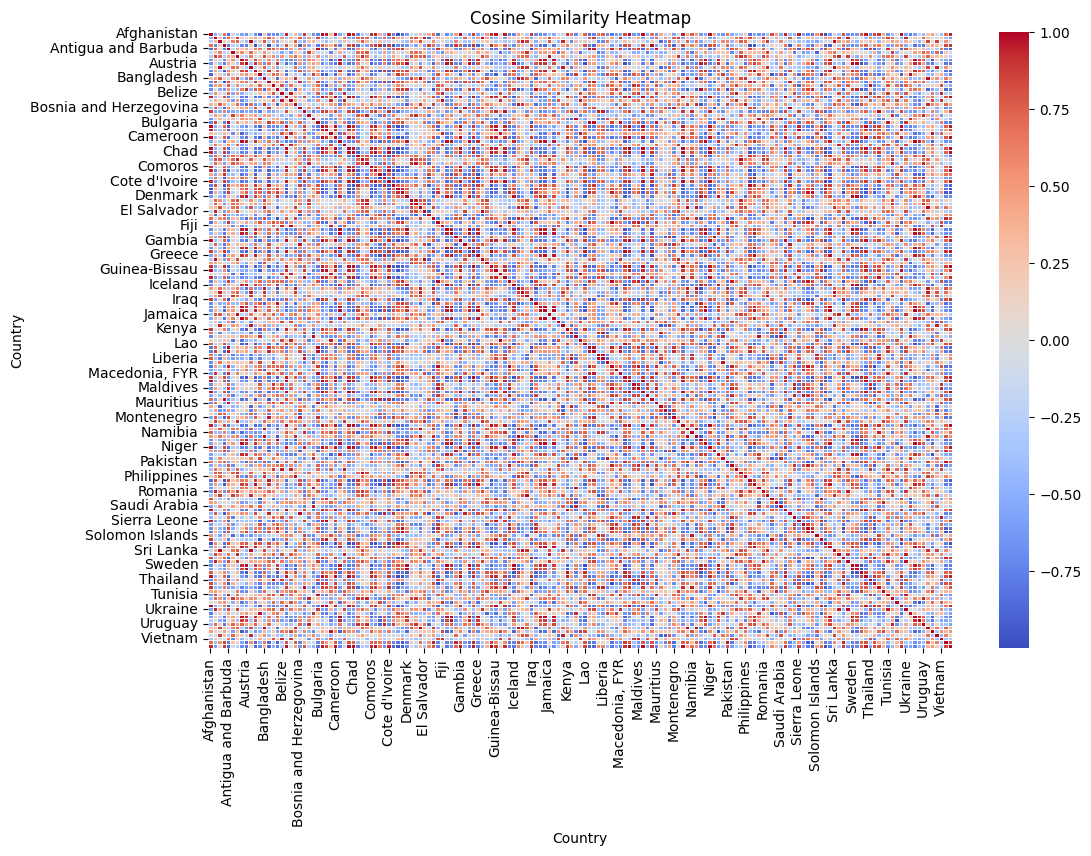

In [ ]:
cos_sim = cosine_similarity(pca_result)

cos_sim_df = pd.DataFrame(cos_sim, index=data['Country'], columns=data['Country'])

print(cos_sim_df)

plt.figure(figsize=(12, 8))
sns.heatmap(cos_sim_df, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Cosine Similarity Heatmap')
plt.show()

Country              Afghanistan   Albania   Algeria    Angola  \
Country                                                          
Afghanistan             0.000000  4.060003  3.805306  2.760322   
Albania                 4.060003  0.000000  1.741527  4.896682   
Algeria                 3.805306  1.741527  0.000000  3.826461   
Angola                  2.760322  4.896682  3.826461  0.000000   
Antigua and Barbuda     4.387582  0.999987  2.045583  4.906057   
...                          ...       ...       ...       ...   
Vanuatu                 2.777073  1.811322  2.026799  3.410669   
Venezuela               4.815661  3.777686  2.185767  4.201104   
Vietnam                 4.227260  1.984271  2.489136  4.317038   
Yemen                   2.309884  3.027229  1.885100  2.266308   
Zambia                  1.037540  4.027920  3.371997  1.778518   

Country              Antigua and Barbuda  Argentina   Armenia  Australia  \
Country                                                          

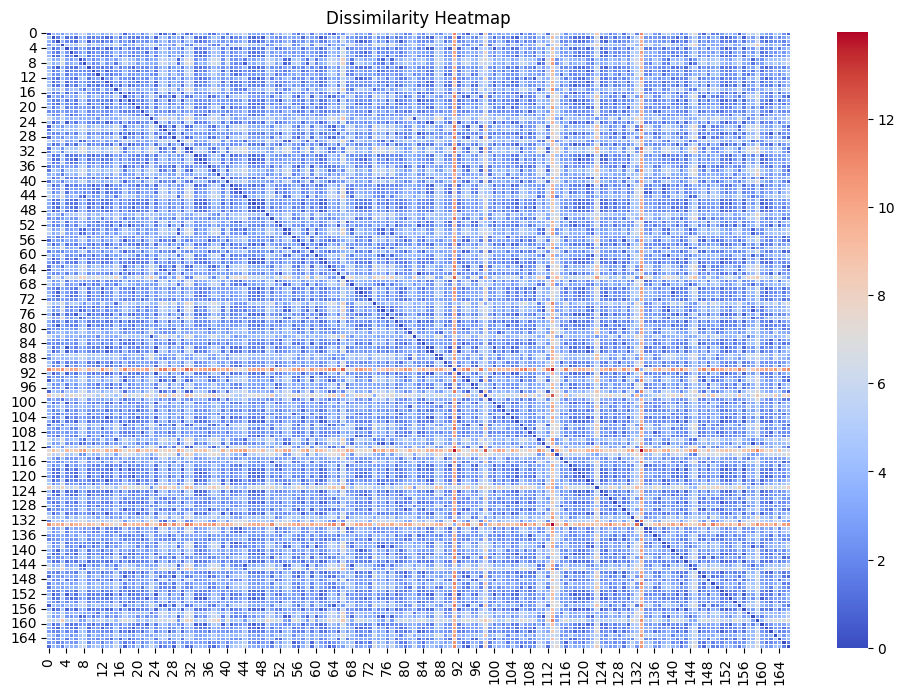

In [ ]:
dissimilarity_matrix = pairwise_distances(pca_result)

dissimilarity_df = pd.DataFrame(dissimilarity_matrix, index=data['Country'], columns=data['Country'])

print(dissimilarity_df)

plt.figure(figsize=(12, 8))
sns.heatmap(dissimilarity_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Dissimilarity Heatmap')
plt.show()

Hierarchical Clustering

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(pca_result)

silhouette_avg = silhouette_score(pca_result, hierarchical_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# คำนวณ centroid ของแต่ละคลัสเตอร์
def compute_cluster_centroids(data, labels):
    centroids = []
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

# คำนวณ inertia แบบ manual
centroids = compute_cluster_centroids(pca_result, hierarchical_labels)
inertia = 0
for i, point in enumerate(pca_result):
    centroid = centroids[hierarchical_labels[i]]
    inertia += np.sum((point - centroid) ** 2)

print(f"Inertia : {inertia:.4f}")

Silhouette Score: 0.2701
Inertia : 703.8227


In [ ]:
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglo.fit(pca_result)

print("Agglomerative Clustering labels:")
print(agglo.labels_)

Agglomerative Clustering labels:
[1 2 1 1 2 1 2 0 0 1 2 0 1 2 2 0 2 1 2 1 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 2 2 0 2 2 1 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 1 1 1 1 0
 2 0 2 0 2 1 1 1 0 2 1 2 2 1 1 0 2 0 2 1 1 2 2 1 0 1 2 1 2 1 2 2 1 1 1 1 0
 0 1 1 0 0 1 2 2 2 1 2 0 0 2 1 1 2 0 1 2 2 1 0 2 2 1 1 2 0 1 2 1 2 0 0 1 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 1 2 1 2 1 1]


Point 1: Cluster 1
Point 2: Cluster 2
Point 3: Cluster 1
Point 4: Cluster 1
Point 5: Cluster 2
Point 6: Cluster 1
Point 7: Cluster 2
Point 8: Cluster 0
Point 9: Cluster 0
Point 10: Cluster 1
Point 11: Cluster 2
Point 12: Cluster 0
Point 13: Cluster 1
Point 14: Cluster 2
Point 15: Cluster 2
Point 16: Cluster 0
Point 17: Cluster 2
Point 18: Cluster 1
Point 19: Cluster 2
Point 20: Cluster 1
Point 21: Cluster 2
Point 22: Cluster 1
Point 23: Cluster 2
Point 24: Cluster 0
Point 25: Cluster 2
Point 26: Cluster 1
Point 27: Cluster 1
Point 28: Cluster 2
Point 29: Cluster 1
Point 30: Cluster 0
Point 31: Cluster 2
Point 32: Cluster 1
Point 33: Cluster 1
Point 34: Cluster 2
Point 35: Cluster 2
Point 36: Cluster 2
Point 37: Cluster 1
Point 38: Cluster 1
Point 39: Cluster 1
Point 40: Cluster 2
Point 41: Cluster 1
Point 42: Cluster 2
Point 43: Cluster 2
Point 44: Cluster 2
Point 45: Cluster 0
Point 46: Cluster 2
Point 47: Cluster 2
Point 48: Cluster 1
Point 49: Cluster 2
Point 50: Cluster 1
Point 51:

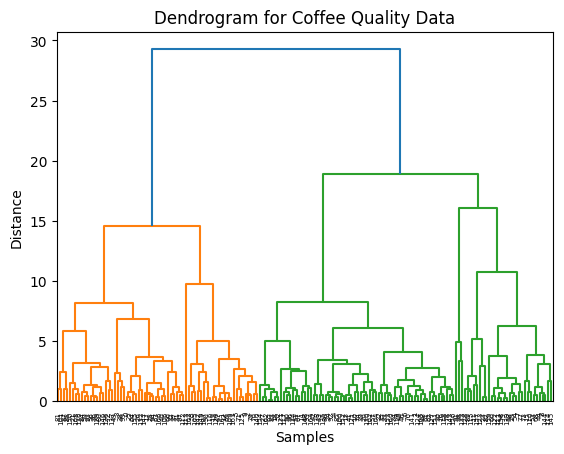

In [ ]:
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # linkage = 'ward' จะใช้ metric = 'euclidean' โดยอัตโนมัติ
hierarchical_model.fit(pca_result)

for i in range(len(hierarchical_model.labels_)):
    print(f'Point {i + 1}: Cluster {hierarchical_model.labels_[i]}')

def plot_dendrogram(X):
    linkage_data = linkage(X, method='ward')
    dendrogram(linkage_data)
    plt.title('Dendrogram for Coffee Quality Data')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(pca_result)

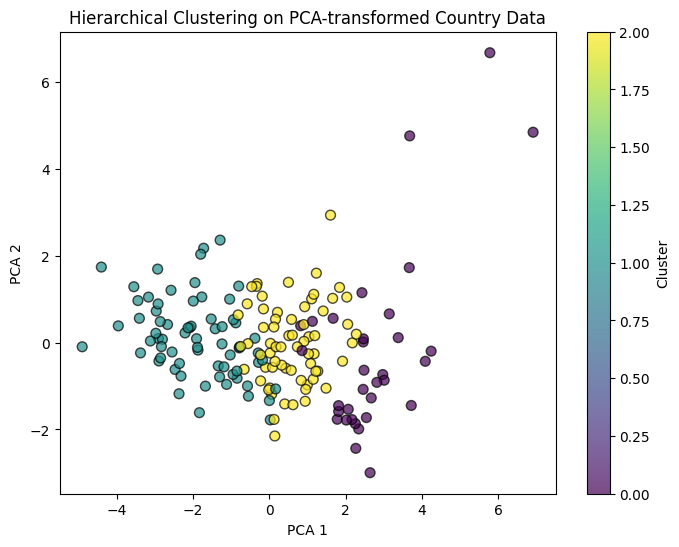

In [ ]:

# Plot ผลลัพธ์ Hierarchical Clustering บน PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hierarchical Clustering on PCA-transformed Country Data')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
data['Agglo_class'] = agglo.labels_

print(data['Agglo_class'].value_counts())

Agglo_class
1    68
2    66
0    33
Name: count, dtype: int64


Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.spatial.distance import mahalanobis

# สร้าง Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(pca_result)

# คำนวณ Silhouette Score
silhouette_avg = silhouette_score(pca_result, gmm_labels)
print(f"Silhouette Score (GMM): {silhouette_avg:.4f}")

# คำนวณ Mahalanobis Distance และสิ่งที่คล้ายกับ inertia ใน GMM
means = gmm.means_
covariances = gmm.covariances_

mahalanobis_distances = []
for i, x in enumerate(pca_result):
    cluster = gmm_labels[i]
    mean = means[cluster]
    covariance = covariances[cluster]
    inv_covariance = np.linalg.inv(covariance)

    # คำนวณ Mahalanobis Distance
    distance = mahalanobis(x, mean, inv_covariance)
    mahalanobis_distances.append(distance**2)  # Sum of squared distances

# คำนวณ "inertia" จาก Mahalanobis Distances
inertia_gmm = np.sum(mahalanobis_distances)
print(f"Inertia : {inertia_gmm:.4f}")


Silhouette Score (GMM): 0.3373
Inertia : 656.5081


               Country  gmm_class
0          Afghanistan          2
1              Albania          1
2              Algeria          1
3               Angola          2
4  Antigua and Barbuda          1


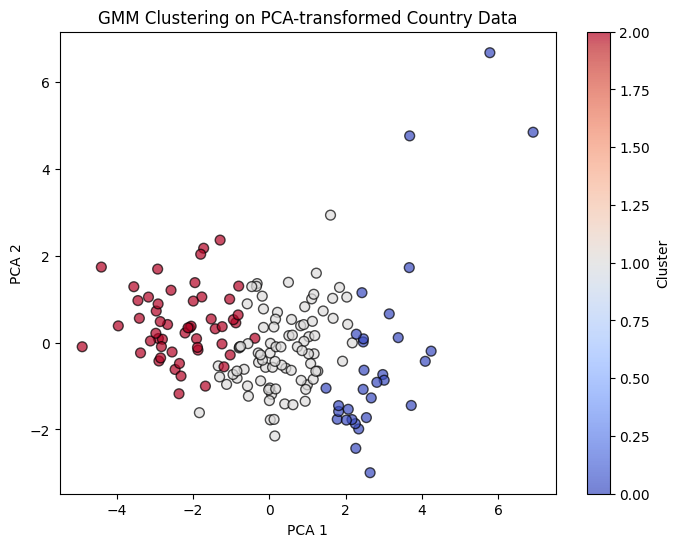

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(pca_result)
data['gmm_class'] = gmm.predict(pca_result)

print(data[['Country', 'gmm_class']].head())

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['gmm_class'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('GMM Clustering on PCA-transformed Country Data')
plt.colorbar(label='Cluster')
plt.show()


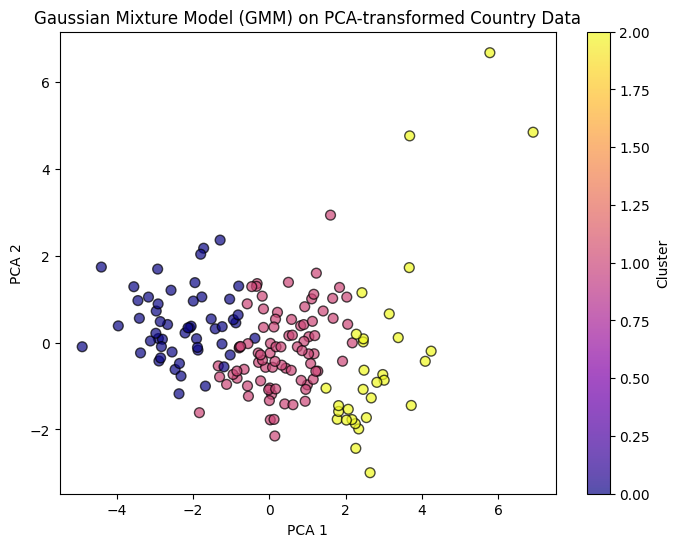

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(pca_result)

gmm_labels = gmm.predict(pca_result)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_labels, cmap='plasma', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Gaussian Mixture Model (GMM) on PCA-transformed Country Data')
plt.colorbar(label='Cluster')
plt.show()

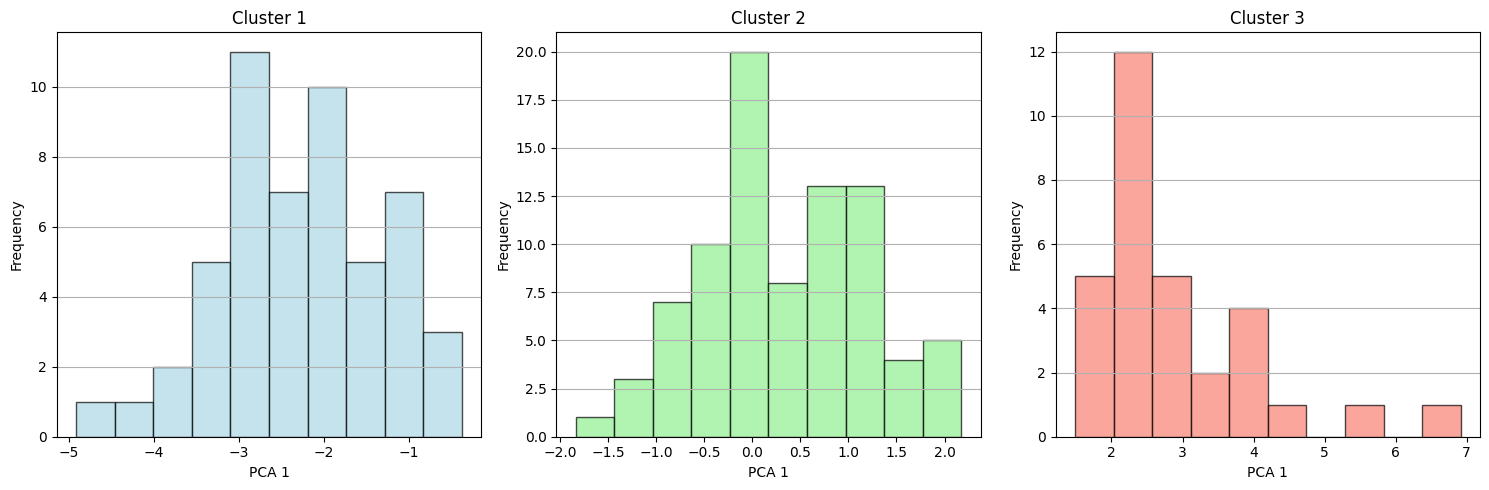

1    84
0    52
2    31
Name: count, dtype: int64


In [ ]:
colors = ['lightblue', 'lightgreen', 'salmon']
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(pca_result[gmm_labels == i, 0], bins=10, alpha=0.7, color=colors[i], edgecolor='black')
    plt.title(f'Cluster {i + 1}')
    plt.xlabel('PCA 1')
    plt.ylabel('Frequency')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

data['GMM_Cluster'] = gmm_labels

print(pd.Series(gmm_labels).value_counts())

DBSCAN (Density-Based Spatial Clustering)

               Country  dbscan_class
0          Afghanistan            -1
1              Albania             0
2              Algeria            -1
3               Angola            -1
4  Antigua and Barbuda             1


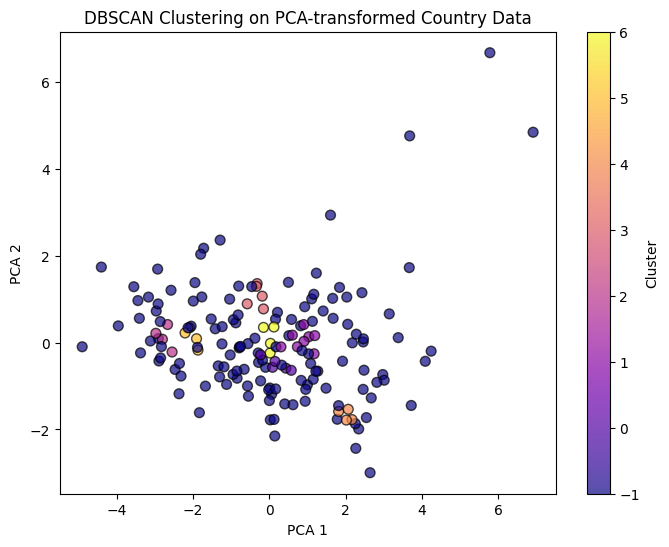

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=4)
data['dbscan_class'] = dbscan.fit_predict(pca_result)

print(data[['Country', 'dbscan_class']].head())

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['dbscan_class'], cmap='plasma', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering on PCA-transformed Country Data')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขสำหรับการทำ clustering
numeric_data = data.select_dtypes(include=[np.number])

# ปรับข้อมูลให้อยู่ในรูปแบบมาตรฐาน
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# ฟังก์ชันสำหรับประเมินคุณภาพโมเดล clustering
def evaluate_clustering(model_name, labels, data):
    if len(np.unique(labels)) > 1:  # ตรวจสอบว่ามีมากกว่า 1 กลุ่มหรือไม่
        silhouette_avg = silhouette_score(data, labels)
        davies_bouldin_avg = davies_bouldin_score(data, labels)
    else:
        silhouette_avg = "N/A"
        davies_bouldin_avg = "N/A"
    return {"Model": model_name, "Silhouette Score": silhouette_avg, "Davies-Bouldin Index": davies_bouldin_avg}

# สร้าง list เก็บผลลัพธ์
results = []

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
results.append(evaluate_clustering("K-means", kmeans_labels, scaled_data))

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)
results.append(evaluate_clustering("Hierarchical Clustering", hierarchical_labels, scaled_data))

# GMM Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)
results.append(evaluate_clustering("GMM", gmm_labels, scaled_data))

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# กรอง noise (label -1) สำหรับ DBSCAN
filtered_data = scaled_data[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]
if len(np.unique(filtered_labels)) > 1:
    results.append(evaluate_clustering("DBSCAN", filtered_labels, filtered_data))
else:
    results.append({"Model": "DBSCAN", "Silhouette Score": "N/A", "Davies-Bouldin Index": "N/A"})

# แปลงผลลัพธ์เป็น DataFrame เพื่อดูง่ายขึ้น
results_df = pd.DataFrame(results)
print(results_df)


                     Model  Silhouette Score  Davies-Bouldin Index
0                  K-means          0.378103              1.067611
1  Hierarchical Clustering          0.376470              1.062792
2                      GMM          0.376189              1.069664
3                   DBSCAN          0.390278              0.833529
